In [ ]:
!git clone https://github.com/opsteryx/Fetal-Health-Classification

Cloning into 'Fetal-Health-Classification'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 46.94 KiB | 3.13 MiB/s, done.
Resolving deltas: 100% (2/2), done.


# Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import learning_curve

In [ ]:
data = pd.read_csv('/content/Fetal-Health-Classification/fetal_health.csv')

In [ ]:
# Detecting and handling duplicates
duplicates = data.copy()
duplicates.drop_duplicates(inplace=True)
print('Total number of duplicates are:', data.shape[0] - duplicates.shape[0])
data = duplicates.copy()

Total number of duplicates are: 13


In [ ]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.shape

(2113, 22)

In [ ]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


Text(0.5, 1.0, 'Correlation Matrix')

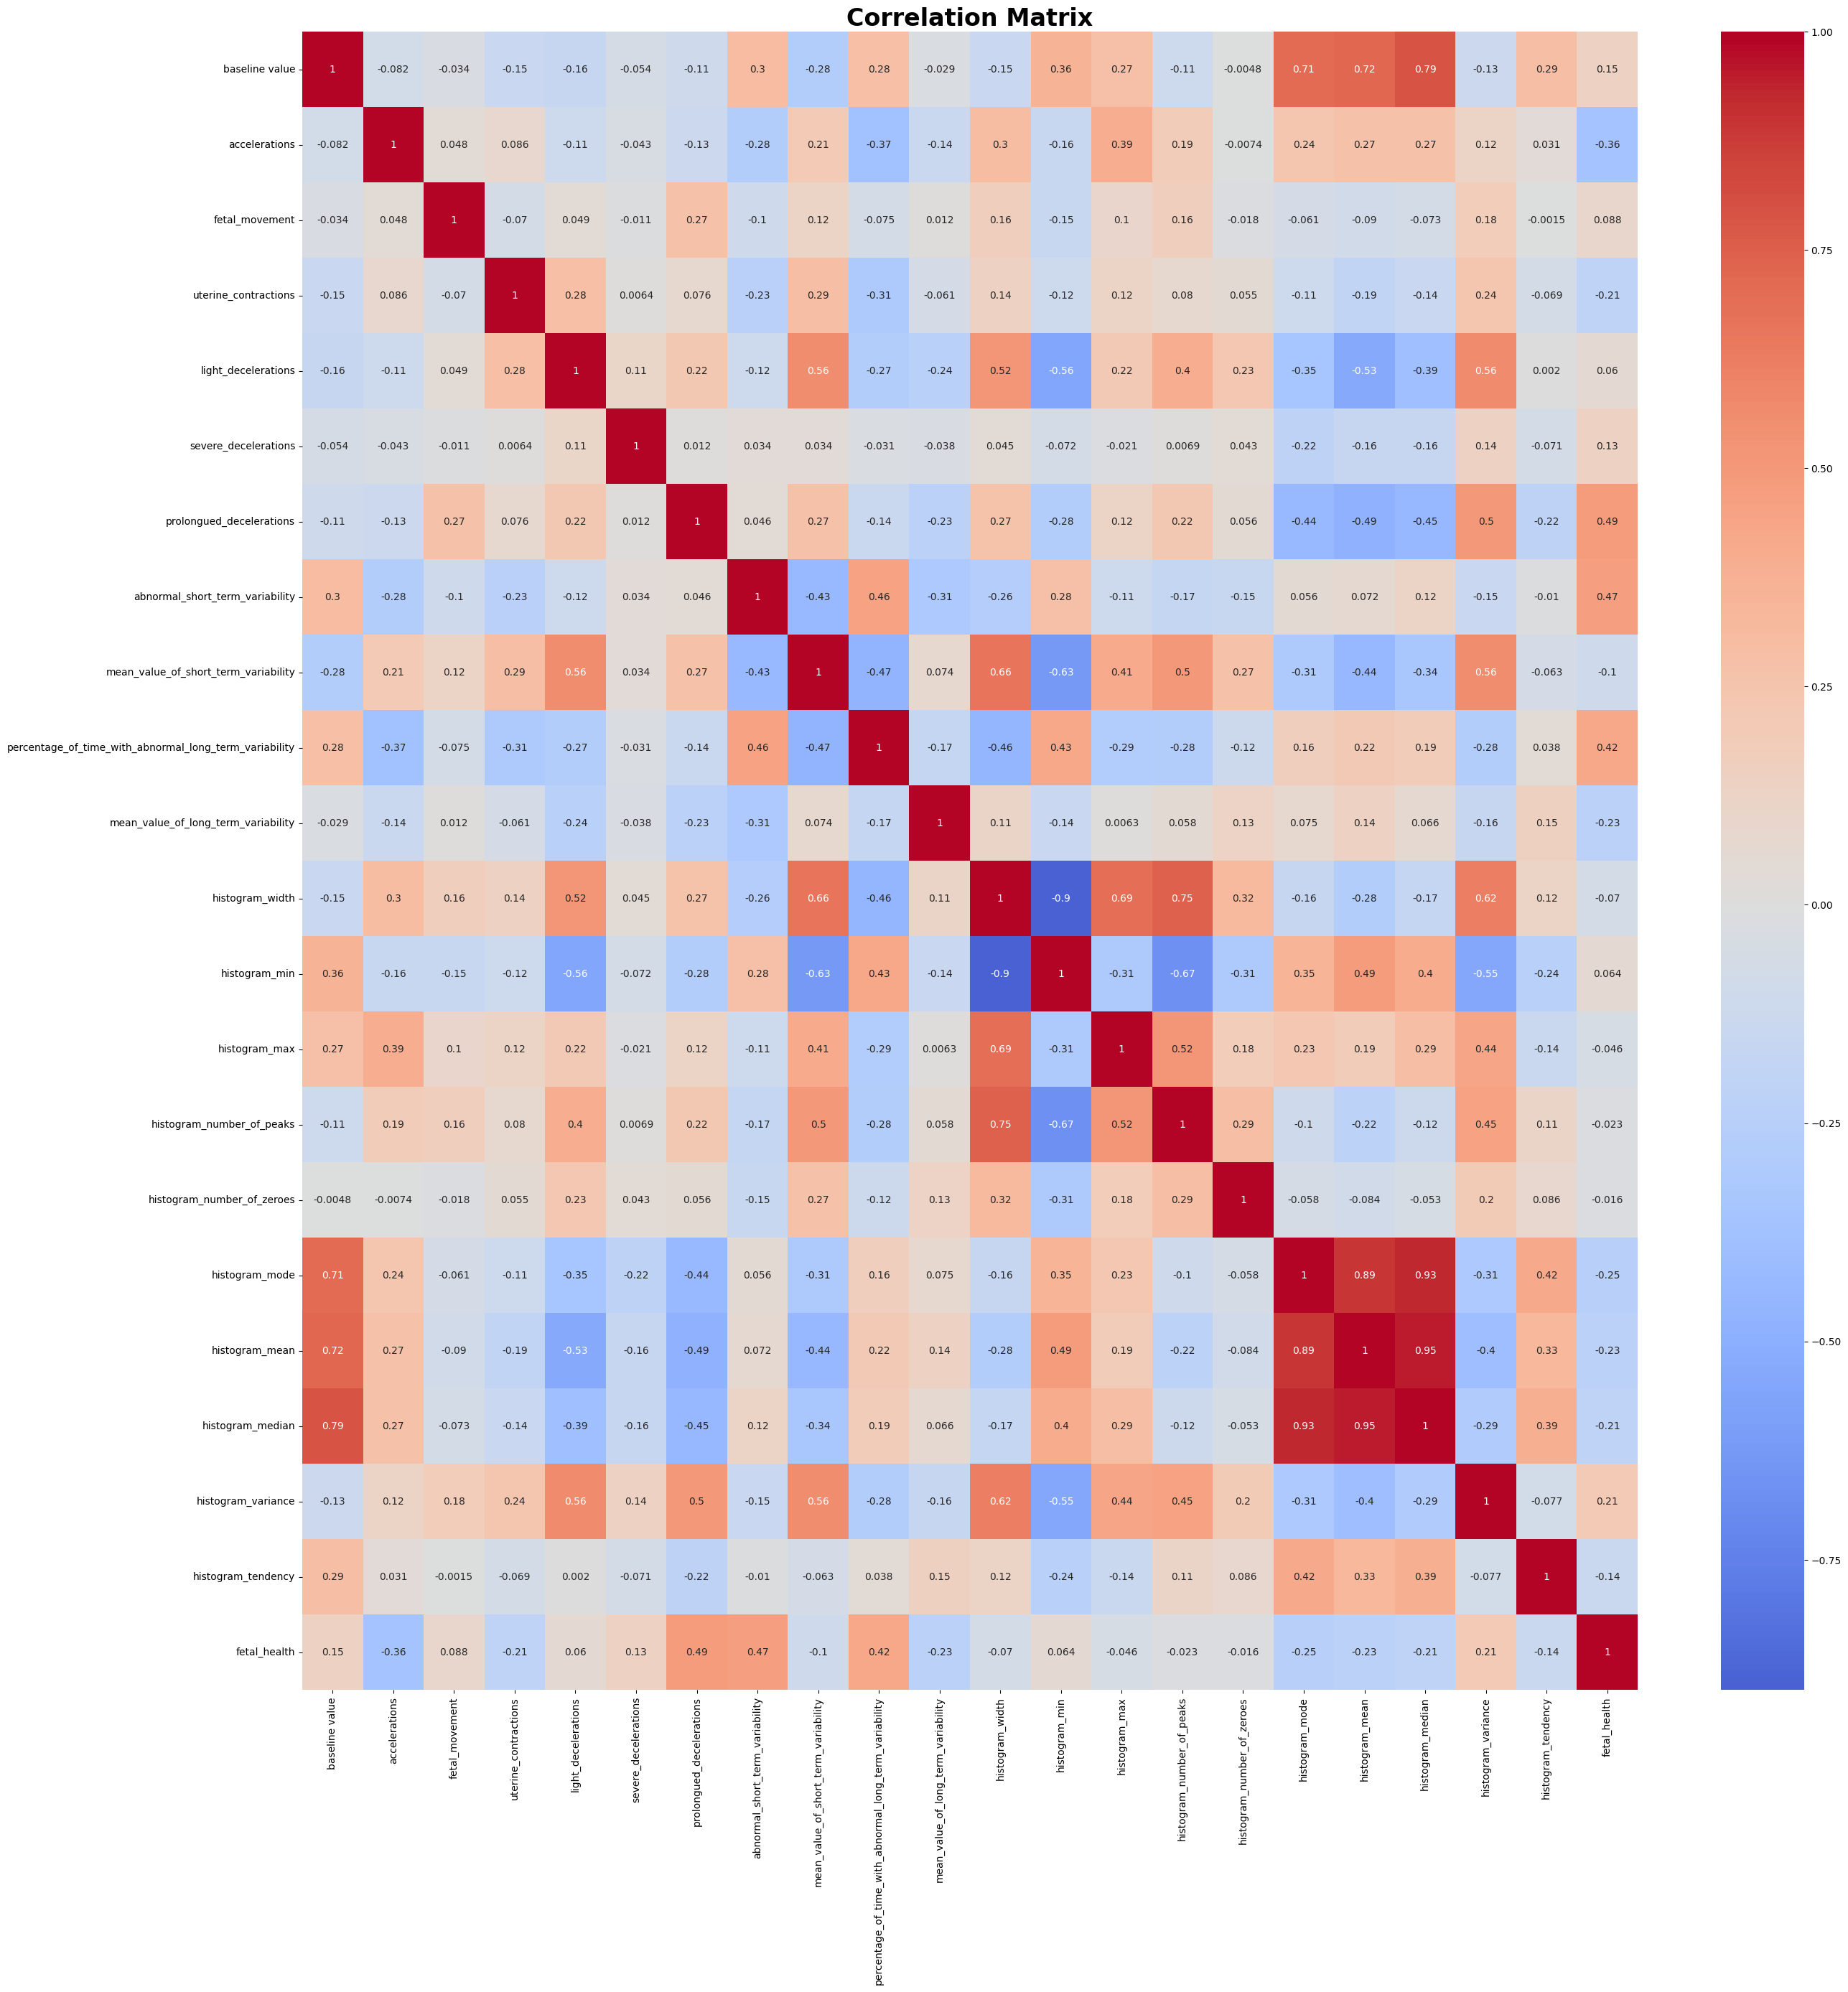

In [ ]:
# Correlation matrix for all features
correlation_matrix = data.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix', fontsize=24, fontweight='bold')

# Data Preprocessing

In [ ]:
# Feature selection with K-Best
X = data.drop(['fetal_health'], axis=1)
Y = data['fetal_health']

bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# Concatenate two dataframes for better understanding
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Sort features based on importance scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

                                              Feature       Score
6                            prolongued_decelerations  507.304309
7                     abnormal_short_term_variability  337.703020
9   percentage_of_time_with_abnormal_long_term_var...  335.386156
17                                     histogram_mean  298.759569
16                                     histogram_mode  276.382795
18                                   histogram_median  249.699523
1                                       accelerations  194.618345
19                                 histogram_variance  150.955827
0                                      baseline value  137.833999
8                mean_value_of_short_term_variability  118.050463
3                                uterine_contractions   93.647474
12                                      histogram_min   86.468440
10                mean_value_of_long_term_variability   69.418940
4                                 light_decelerations   66.750344
11        

In [ ]:
# Finding the least correlated features with fetal health
low_score_features = featureScores[featureScores['Score'] < 15]
print(low_score_features)

                       Feature      Score
14   histogram_number_of_peaks  11.726828
2               fetal_movement  11.700712
13               histogram_max   2.523350
15  histogram_number_of_zeroes   2.134901


In [ ]:
# Dropping the features that are below the threshold
features_to_drop = ['histogram_number_of_peaks', 'fetal_movement', 'histogram_max', 'histogram_number_of_zeroes']
data = data.drop(features_to_drop, axis=1)

In [ ]:
# Splitting data into features (X) and outcomes (y)
X = data.drop(["fetal_health"], axis=1)
y = data["fetal_health"]

In [ ]:
# Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()

X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

In [ ]:
#Description of the standardized features
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,-1.143325e-15,1.000237,-2.776252,-0.742724,-0.030989,0.680746,2.714274
accelerations,2113.0,6.725440e-18,1.000237,-0.823776,-0.823776,-0.307036,0.726444,4.085254
uterine_contractions,2113.0,8.070528e-17,1.000237,-1.492245,-0.811961,0.208464,0.888747,3.609880
light_decelerations,2113.0,-8.070528e-17,1.000237,-0.641203,-0.641203,-0.641203,0.370643,4.418027
severe_decelerations,2113.0,-6.725440e-18,1.000237,-0.057653,-0.057653,-0.057653,-0.057653,17.345234
prolongued_decelerations,2113.0,4.035264e-17,1.000237,-0.269640,-0.269640,-0.269640,-0.269640,8.183605
abnormal_short_term_variability,2113.0,-1.345088e-17,1.000237,-2.037640,-0.873069,0.116815,0.815557,2.329499
mean_value_of_short_term_variability,2113.0,-4.035264e-17,1.000237,-1.283731,-0.718221,-0.152712,0.412798,6.407199
percentage_of_time_with_abnormal_long_term_variability,2113.0,2.690176e-17,1.000237,-0.534294,-0.534294,-0.534294,0.065725,4.429504
mean_value_of_long_term_variability,2113.0,1.076070e-16,1.000237,-1.450150,-0.633328,-0.136131,0.467607,7.552654


# Model Evaluation

In [ ]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 17), (423, 17), (1690,), (423,))

KNN

In [ ]:
# K-Nearest-Neighbors Classification
knn = KNeighborsClassifier()

In [ ]:
# Parameter tuning with GridSearchCV
param_knn = {
    'n_neighbors': list(range(1, 31)),
    'p': (1, 2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

In [ ]:
# Fitting the model for GridSearchCV
grid_search_knn = GridSearchCV(knn, param_knn, cv=10, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': (1, 2), 'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [ ]:
# Best parameters for KNN
grid_search_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

In [ ]:
# Fitting KNN with the best parameters
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [ ]:
# Prediction and accuracy
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred) * 100

92.90780141843972

In [ ]:
# KNN Classification report (precision, recall, f1-score, support, accuracy)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       341
         2.0       0.75      0.72      0.74        54
         3.0       0.90      0.93      0.91        28

    accuracy                           0.93       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.93      0.93      0.93       423



Random Forest Classification

In [ ]:
# Random Forest Classification
rf = RandomForestClassifier()

In [ ]:
# Parameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# Best parameters for Random Forest
best_params_for_rf = grid_search_rf.best_params_
print(best_params_for_rf)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Fitting Random Forest with the best parameters
rf_classifier = RandomForestClassifier(**best_params_for_rf, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Prediction and accuracy
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf) * 100

96.45390070921985

In [ ]:
# Random Forest Classification report (precision, recall, f1-score, support, accuracy)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.91      0.80      0.85        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.96      0.93      0.94       423
weighted avg       0.96      0.96      0.96       423



Support Vector Classifier

In [ ]:
# Support Vector Classifier
svc = SVC()

In [ ]:
# Parameter tuning with GridSearchCV
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['linear', 'rbf', 'poly'],
}
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=10)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.001, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
# Best parameters for SVC
best_params_for_svc = grid_search_svc.best_params_
print(best_params_for_svc)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Fitting SVC with the best parameters
svc_classifier = SVC(**best_params_for_svc, random_state=42)
svc_classifier.fit(X_train, y_train)

SVC(C=10, random_state=42)

In [ ]:
# Prediction and accuracy
y_pred_svc = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_svc) * 100

In [ ]:
# SVC Classification report (precision, recall, f1-score, support, accuracy)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       341
         2.0       0.86      0.78      0.82        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.94      0.92      0.93       423
weighted avg       0.95      0.96      0.95       423



In [ ]:
# Training, test scores and margin of error of the models
pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'SVC'],
    'Training Score': [knn.score(X_train, y_train), rf_classifier.score(X_train, y_train), svc_classifier.score(X_train, y_train)],
    'Test Score': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svc)],
    'Error': [knn.score(X_train, y_train) - accuracy_score(y_test, y_pred), rf_classifier.score(X_train, y_train) - accuracy_score(y_test, y_pred_rf), svc_classifier.score(X_train, y_train) - accuracy_score(y_test, y_pred_svc)]
})

,Model,Training Score,Test Score,Error
0,KNN,0.999408,0.929078,0.070330
1,Random Forest,0.999408,0.964539,0.034869
2,SVC,0.958580,0.955083,0.003497
